In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#print(os.getcwd())
df = pd.read_csv('demo/tutorial.csv', delimiter=';')

# replace na with 0
df.fillna(0, inplace=True)

# Create columns volume_weighted bid and ask
df['volume_weighted_bid'] = (df['bid_price_1'] * df['bid_volume_1'] + df['bid_price_2'] * df['bid_volume_2'] + df['bid_price_3'] * df['bid_volume_3']) / (df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3'])
df['volume_weighted_ask'] = (df['ask_price_1'] * df['ask_volume_1'] + df['ask_price_2'] * df['ask_volume_2'] + df['ask_price_3'] * df['ask_volume_3']) / (df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3'])
df['total_bid_volume'] = df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3']
df['total_ask_volume'] = df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3']


df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,...,10005.0,29.0,0.0,0.0,10003.0,0.0,9995.281250,10004.935484,32.0,31.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5002.5,0.0,4997.156250,5003.000000,32.0,31.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,0.0,0.0,10004,...,10005.0,22.0,0.0,0.0,10000.0,0.0,9995.083333,10004.916667,24.0,24.0
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,...,5004.0,22.0,0.0,0.0,5000.0,0.0,4997.000000,5003.916667,24.0,24.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5000.0,0.0,4996.090909,5003.000000,22.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,...,10005.0,25.0,0.0,0.0,10001.0,0.0,9995.742857,10004.925926,35.0,27.0
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,...,0.0,0.0,0.0,0.0,4952.5,0.0,4949.000000,4956.000000,21.0,21.0
3997,-2,199800,AMETHYSTS,9995,21,0.0,0.0,0.0,0.0,10002,...,10005.0,21.0,0.0,0.0,9998.5,0.0,9995.000000,10004.172414,21.0,29.0
3998,-2,199900,STARFRUIT,4950,32,0.0,0.0,0.0,0.0,4954,...,4956.0,32.0,0.0,0.0,4952.0,0.0,4950.000000,4955.641026,32.0,39.0


Product:  AMETHYSTS
10000.05375


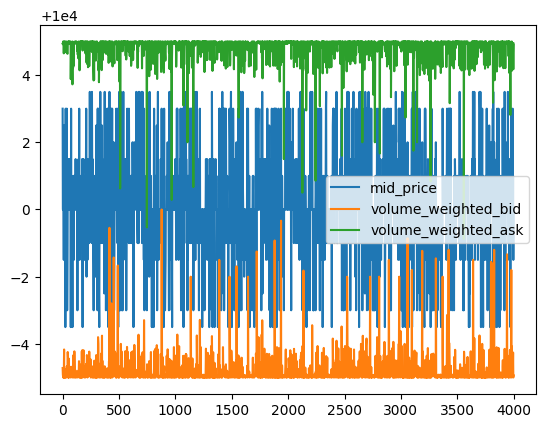

Product:  STARFRUIT
4980.30225


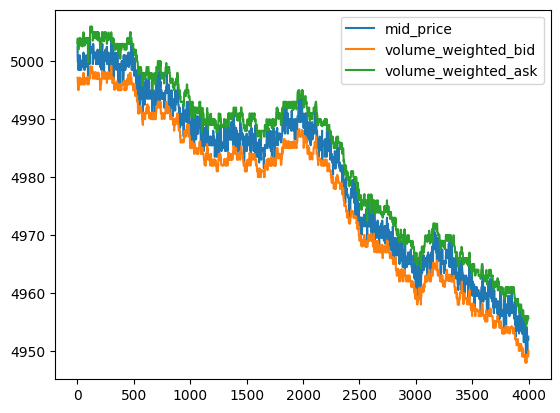

In [7]:
products = df['product'].unique()
products

for product in products:
    p_df = df[df['product'] == product]
    print("Product: ", product) 
    print(p_df['mid_price'].mean())
    
    #Plot the line graph for each product mid_price, mean of bid_price 1, 2, 3 and maean of ask_price 1, 2, 3
    plt.plot(p_df['mid_price'], label='mid_price')
    plt.plot(p_df['volume_weighted_bid'], label='volume_weighted_bid')
    plt.plot(p_df['volume_weighted_ask'], label='volume_weighted_ask')
    plt.legend()
    plt.show()
    
    
    
    
    


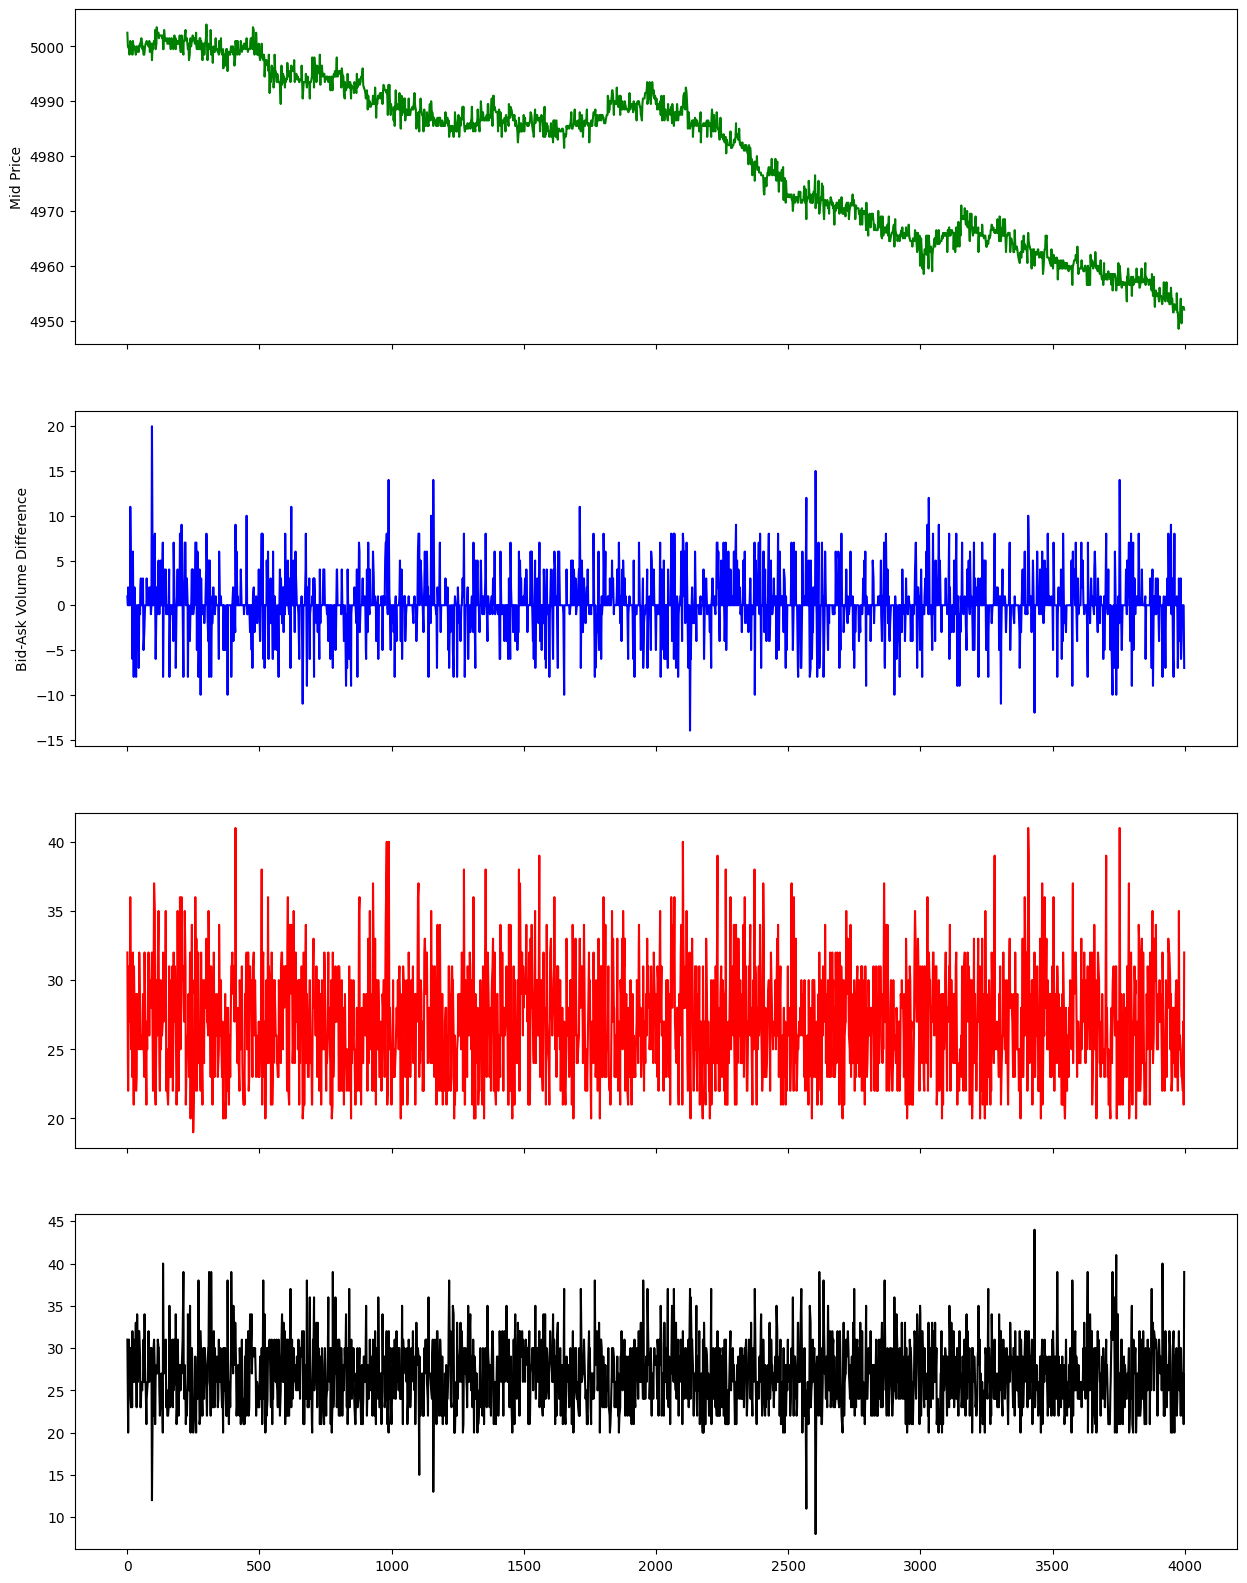

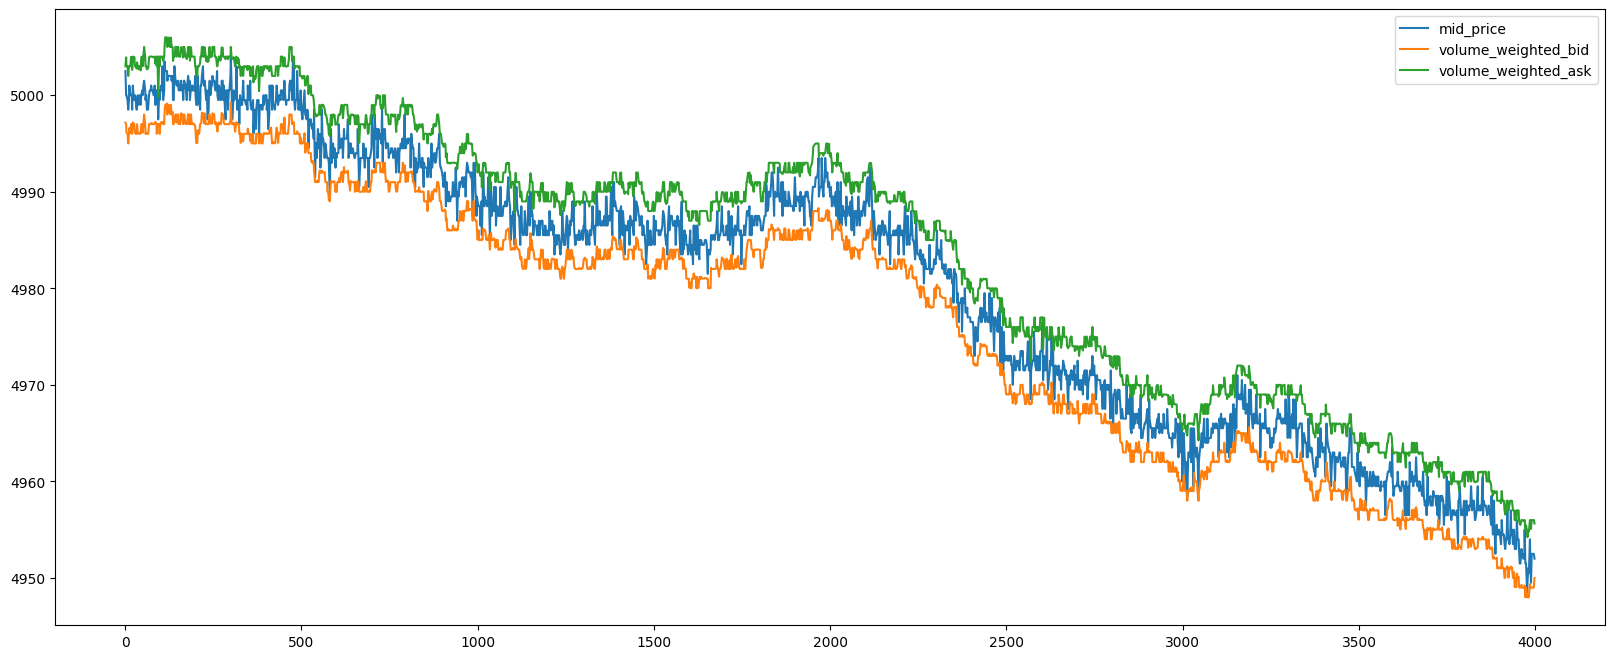

In [8]:
starfruit_df = df[df['product'] == 'STARFRUIT']

# Create figure and axes for the two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15, 20))

# Plot mid price on the first subplot
ax1.plot(starfruit_df.index, starfruit_df['mid_price'], color='green')
ax1.set_ylabel('Mid Price')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax2.plot(starfruit_df.index, starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'], color='blue')
ax2.set_ylabel('Bid-Ask Volume Difference')


# Plot the difference between total bid volume and total ask volume on the second subplot
ax3.plot(starfruit_df.index, starfruit_df['total_bid_volume'], color='red')

ax4.plot(starfruit_df.index, starfruit_df['total_ask_volume'], color='black')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(starfruit_df['mid_price'], label='mid_price')
plt.plot(starfruit_df['volume_weighted_bid'], label='volume_weighted_bid')
plt.plot(starfruit_df['volume_weighted_ask'], label='volume_weighted_ask')
plt.legend()
plt.show()




In [9]:
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5002.5,0.0,4997.156250,5003.000000,32.0,31.0
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,...,5004.0,22.0,0.0,0.0,5000.0,0.0,4997.000000,5003.916667,24.0,24.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5000.0,0.0,4996.090909,5003.000000,22.0,20.0
7,-2,300,STARFRUIT,4996,31,0.0,0.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,4999.5,0.0,4996.000000,5003.000000,31.0,31.0
9,-2,400,STARFRUIT,4995,27,0.0,0.0,0.0,0.0,5002,...,0.0,0.0,0.0,0.0,4998.5,0.0,4995.000000,5002.000000,27.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,0.0,0.0,0.0,0.0,4956,...,0.0,0.0,0.0,0.0,4952.5,0.0,4949.000000,4956.000000,23.0,23.0
3993,-2,199600,STARFRUIT,4949,22,0.0,0.0,0.0,0.0,4956,...,0.0,0.0,0.0,0.0,4952.5,0.0,4949.000000,4956.000000,22.0,22.0
3994,-2,199700,STARFRUIT,4949,27,0.0,0.0,0.0,0.0,4956,...,0.0,0.0,0.0,0.0,4952.5,0.0,4949.000000,4956.000000,27.0,27.0
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,...,0.0,0.0,0.0,0.0,4952.5,0.0,4949.000000,4956.000000,21.0,21.0


In [16]:
import jsonpickle
import pandas as pd
import random 

database = {
    'TIMESTAMP': [],
    'PRODUCT': [],
    'MAX_BID': [],
    'MIN_BID': [],
    'MAX_ASK': [],
    'MIN_ASK': [],
    'BID_VOLUME': [],
    'ASK_VOLUME': [],
    'VWAP_BID': [],
    'VWAP_ASK': [],    
    'MID_PRICE': [],
    'MID_PRICE_DIFF': [],  
}


#Sample entry
entry = {
    'TIMESTAMP': 123456789,
    'PRODUCT': 'product1',
    'MAX_BID': 100,
    'MIN_BID': 99,
    'MAX_ASK': 101,
    'MIN_ASK': 100,
    'BID_VOLUME': 1000,
    'ASK_VOLUME': 1000,
    'VWAP_BID': 99.5,
    'VWAP_ASK': 100.5,    
}
for i in range(7):
    database['TIMESTAMP'].append(i)
    database['PRODUCT'].append('product1')
    database['MAX_BID'].append(100 + i * random.random())
    database['MIN_BID'].append(99+ i * random.random())
    database['MAX_ASK'].append(101+ i * random.random())
    database['MIN_ASK'].append(100+ i * random.random())
    database['BID_VOLUME'].append(1000+ i * random.random())
    database['ASK_VOLUME'].append(1000+ i * random.random())
    database['VWAP_BID'].append(99.5+ i * random.random())
    database['VWAP_ASK'].append(100.5+ i * random.random())
    database['MID_PRICE'].append(100+ i * random.random())
    if len(database['MID_PRICE_DIFF']) > 1:
        database['MID_PRICE_DIFF'].append(((database['MID_PRICE'][-1] - database['MID_PRICE'][-2])/database['MID_PRICE'][-2]))
    else:
        database['MID_PRICE_DIFF'].append(0)

#Save the database
database

{'TIMESTAMP': [0, 1, 2, 3, 4, 5, 6],
 'PRODUCT': ['product1',
  'product1',
  'product1',
  'product1',
  'product1',
  'product1',
  'product1'],
 'MAX_BID': [100.0,
  100.87127996501337,
  101.30533330113104,
  101.27912679000954,
  103.4772363628905,
  100.6424662652077,
  100.35218714067523],
 'MIN_BID': [99.0,
  99.7946419118441,
  99.31931228024277,
  99.91138483121645,
  102.04473266830358,
  99.04017896110066,
  102.65821759227741],
 'MAX_ASK': [101.0,
  101.17905202866812,
  101.17361615057592,
  103.73240278973267,
  103.90616755211256,
  103.86497857095812,
  106.23806002863239],
 'MIN_ASK': [100.0,
  100.15705935808447,
  101.98768104584491,
  100.17494569968541,
  103.13358523830463,
  103.09458415998186,
  104.97008502573038],
 'BID_VOLUME': [1000.0,
  1000.3756346058154,
  1000.5620421617652,
  1001.1093570342838,
  1002.9395178036202,
  1004.2456504657797,
  1002.4341529794535],
 'ASK_VOLUME': [1000.0,
  1000.8268385401567,
  1000.8003635723479,
  1002.4487757258672,
  

93.12972360976985


Text(0, 0.5, 'rsi_3')

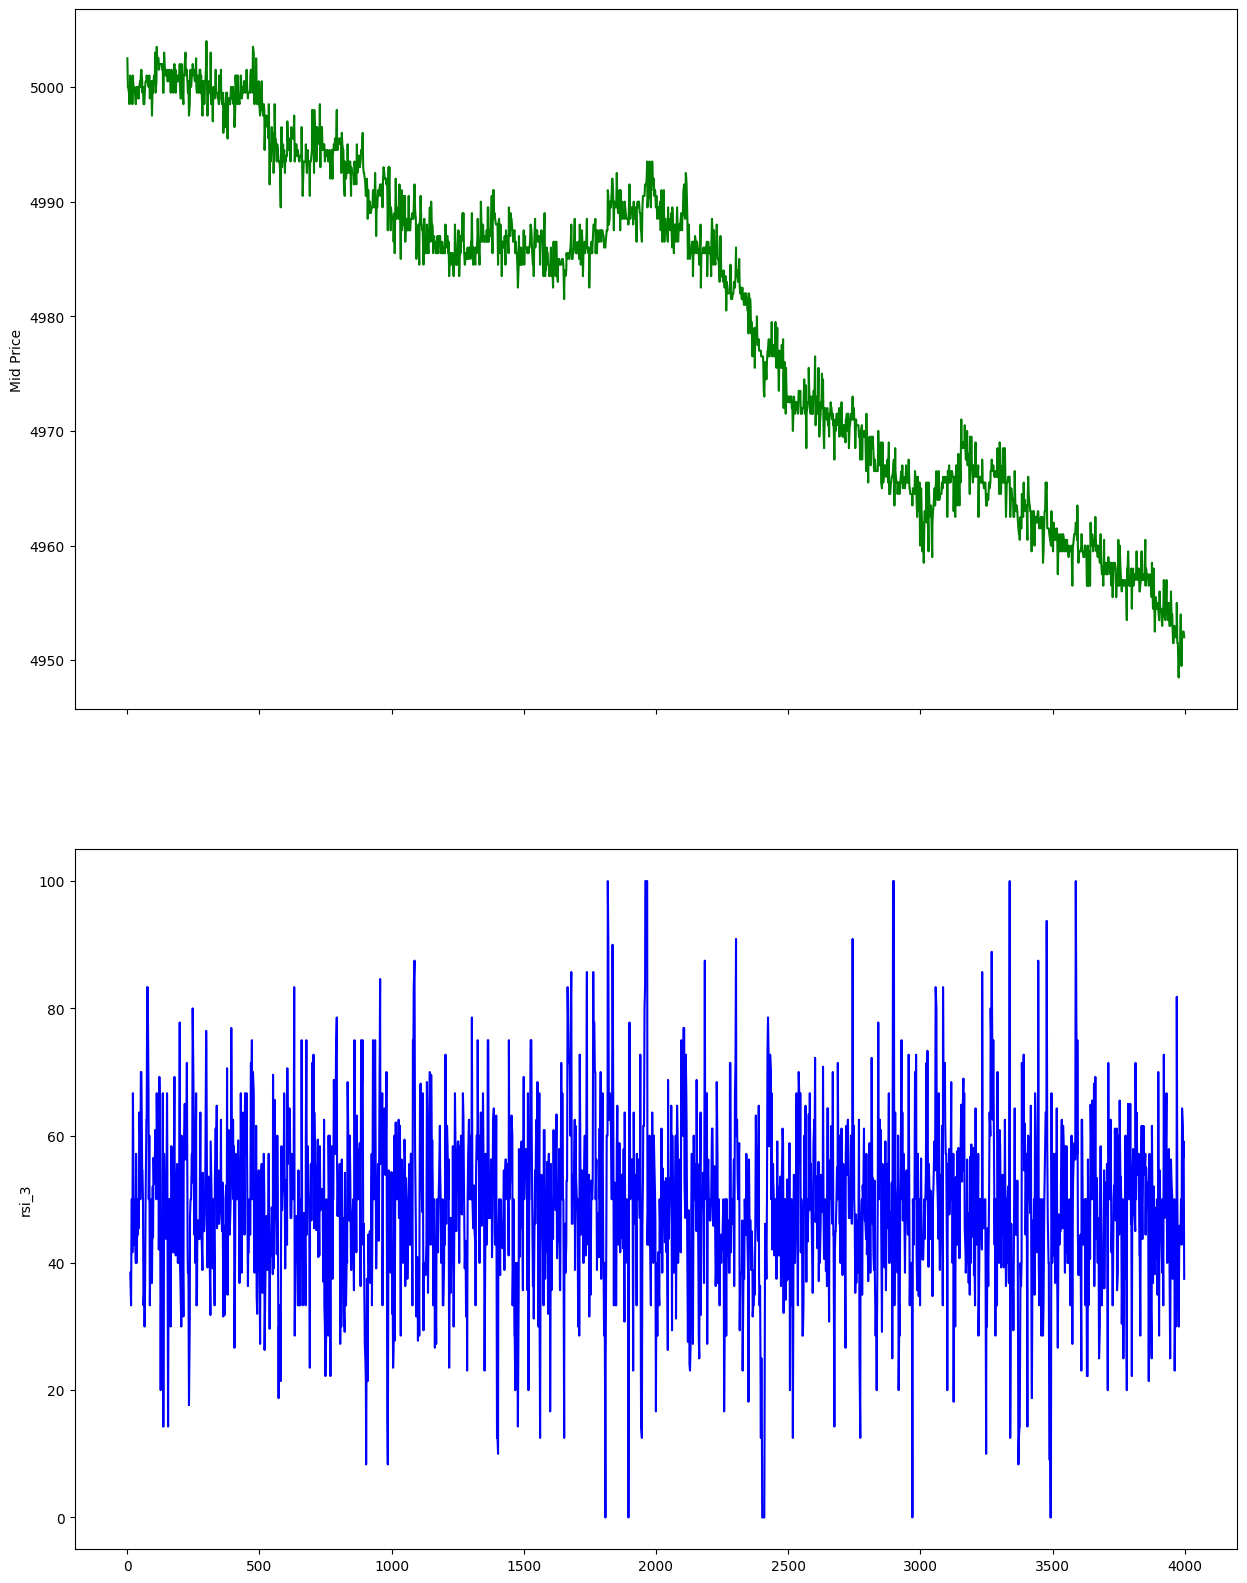

In [21]:

#Pass in mid_price_diff
def rsi_7(df):
    last_7 = df[-7:]
    gain = sum([x for x in last_7 if x > 0]) / 7
    loss = -1 * sum([x for x in last_7 if x < 0]) / 7
    rs = gain / loss
    return 100 - (100 / (1 + rs))


def rsi_3_starfruit(df):
    delta = df['mid_price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(7).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(7).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))


RSI_3 = rsi_3_starfruit(starfruit_df)


# 
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 20))

# Plot mid price on the first subplot
ax1.plot(starfruit_df.index, starfruit_df['mid_price'], color='green')
ax1.set_ylabel('Mid Price')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax2.plot(starfruit_df.index, RSI_3, color='blue')
ax2.set_ylabel('rsi_3')
